# Part A

## Seperation Boundary 
* We know that seperation boundary will be $w_0 + w_1x_1 + w_2x_2 = 0$
* In the question it is given as $x_2 = ax_1 + b$ => $x_2 - ax_1 - b = 0$
* $b = -w_0/w_2$
* $a = -w_1/w_2$

# Part B

## Setting a Target Function
* The target function will be set as the line $x_1 = x_2$

In [1]:
def targetFunction(x1, x2):
    if x2 > x1:
        return 1
    elif x1 > x2:
        return -1
    else:
        return 0

## Implementing a Function to Create Linearly Seperable Datasets
* The samples will be in the interval $0 \le x_1 \le 10$ and $0 \le x_2 \le 10$

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import math


random.seed(6)

def datasetMaker(size):
    dataset = []

    count = 0
    while count < size:
        
        # Generating two coordinates between 0 and 10
        point_x1 = random.random()*10
        point_x2 = random.random()*10
        
        # If the point is too close to the boundary, we reject it to make the seperation noticable
        if abs(point_x1 - point_x2) < 0.3:
            continue
            
        # We embed the label into the dataset
        # We reject the point if it is exactly on the boundary (prevented by the lines above anyways)
        label = targetFunction(point_x1, point_x2)
        if label != 0:
            dataset.append([point_x1, point_x2, label])
            count += 1
        else:
            continue
    
    return dataset

## Creating and Plotting the Dataset with the Target Function

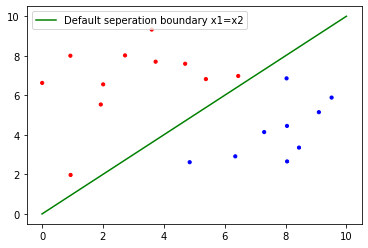

In [3]:
dataset = datasetMaker(20)
dataset = np.array(dataset)
colors = ["blue", "red"]
x = np.linspace(0, 10, 100)
plt.plot(x, x, color="green", label="Default seperation boundary x1=x2")
plt.scatter(dataset[:, 0], dataset[:, 1], c = dataset[:, 2], cmap = matplotlib.colors.ListedColormap(colors), s=10)
plt.legend()
plt.show()

# Part C

## Implementing the Perceptron Algorithm

In [4]:
# This function will return an array that defines the weights of each feature and the number of steps
# "dataset" contains the feature values of each point and the class they fall into
def perceptron(dataset):
    weights = [1,2,3] # Giving random numbers to weight vector
    steps = 0
    completed = False
    while not completed:
        for i in dataset:
            completed = True
            
            # Two ifs below modify our weight vector using a falsely classified sample
            if i[2] == 1 and weights[0] + weights[1]*i[0] + weights[2]*i[1] <= 0:
                steps += 1
                weights[0] += 1
                weights[1] += i[0]
                weights[2] += i[1]
                completed = False
                break
            elif i[2] == -1 and weights[0] + weights[1]*i[0] + weights[2]*i[1] >= 0:
                steps += 1
                weights[0] -= 1
                weights[1] -= i[0]
                weights[2] -= i[1]
                completed = False
                break
                
    return weights, steps            

## Running the Perceptron on the Dataset

In [5]:
w, s = perceptron(dataset)
print("Weight vector:", w)
print("Number of steps:", s)

Weight vector: [0, -8.924966269018848, 9.562526161386192]
Number of steps: 7


## Plotting the Dataset, Target Function and Perceptron Function's Output

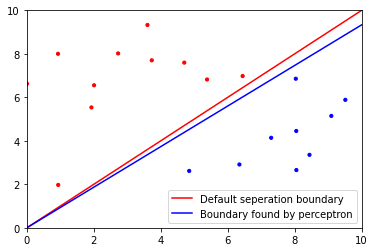

In [6]:
x = np.linspace(0, 10, 100)
plt.plot(x, x, color="red", label="Default seperation boundary")
plt.plot(x, -(w[1]*x + w[0])/ w[2], color="blue", label="Boundary found by perceptron")
plt.scatter(dataset[:, 0], dataset[:, 1], c = dataset[:, 2], cmap = matplotlib.colors.ListedColormap(colors), s=10)
plt.xlim([0,10])
plt.ylim([0,10])
plt.legend()
plt.show()

* f is not close to g since it is simpler to fit a seperating line for 20 samples which creates some freedom for distinct seperating lines

# Part D

## Generating a Linearly Seperable Dataset of Size 1000

In [7]:
dataset = datasetMaker(1000)
dataset = np.array(dataset)

## Running the Perceptron on the Dataset

In [8]:
w, s = perceptron(dataset)
print("Weight vector:", w)
print("Number of steps:", s)

Weight vector: [-2, -31.682119258471836, 32.77776510467608]
Number of steps: 41


## Plotting the Dataset, Target Function and Perceptron Function's Output

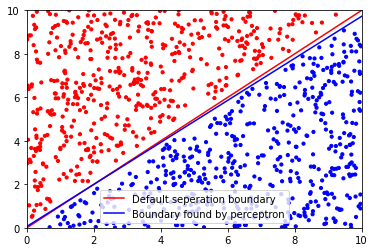

In [9]:
x = np.linspace(0, 10, 100)
plt.plot(x, x, color="red", label="Default seperation boundary")
plt.plot(x, -(w[1]*x + w[0])/ w[2], color="blue", label="Boundary found by perceptron")
plt.scatter(dataset[:, 0], dataset[:, 1], c = dataset[:, 2], cmap = matplotlib.colors.ListedColormap(colors), s=10)
plt.xlim([0,10])
plt.ylim([0,10])
plt.legend()
plt.show()

* In this case f is very close to g since the space for a seperating line is way less compared to the previous sample
* Number of steps increased drastically due to the dataset size